<a href="https://colab.research.google.com/github/HenriqueCCdA/Prophet/blob/main/notebook/trend_changepoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
uri = 'https://raw.githubusercontent.com/HenriqueCCdA/Prophet/main/examples/example_wp_log_R.csv'

df = pd.read_csv(uri)

In [ ]:
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


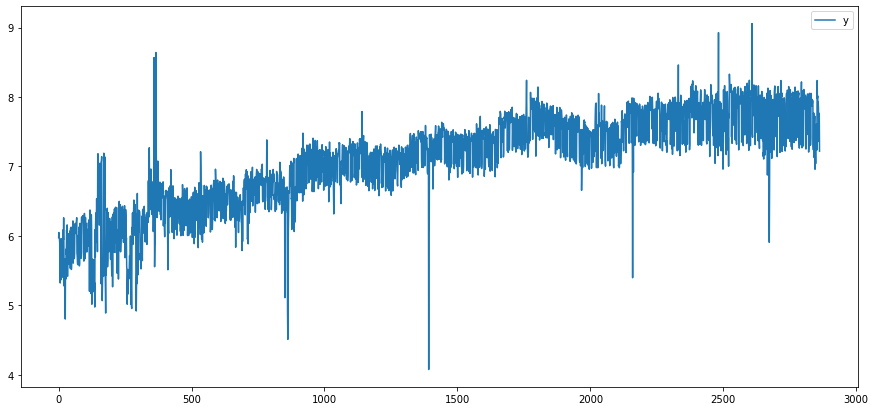

In [ ]:
df.plot(figsize=(15,7))

In [ ]:
df['cap'] = 8.5
df.head()

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5


# Forecasting Growth

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=5000)
future['cap'] = 8.5
fcst = m.predict(future)

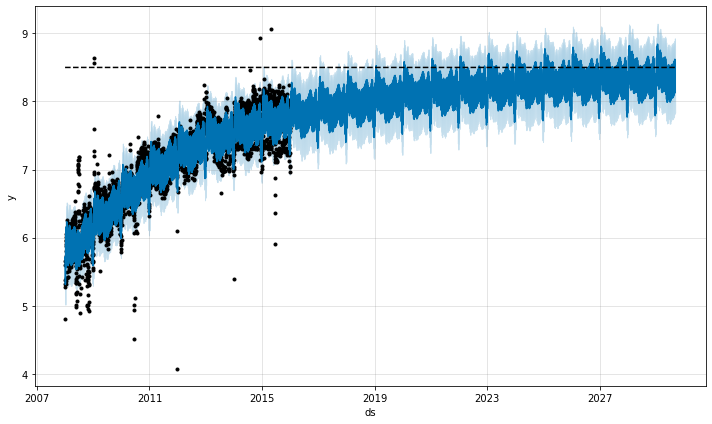

In [ ]:
fig=m.plot(fcst)

# Saturating Minimum

In [ ]:
df['y'] = 10 - df['y']

In [ ]:
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


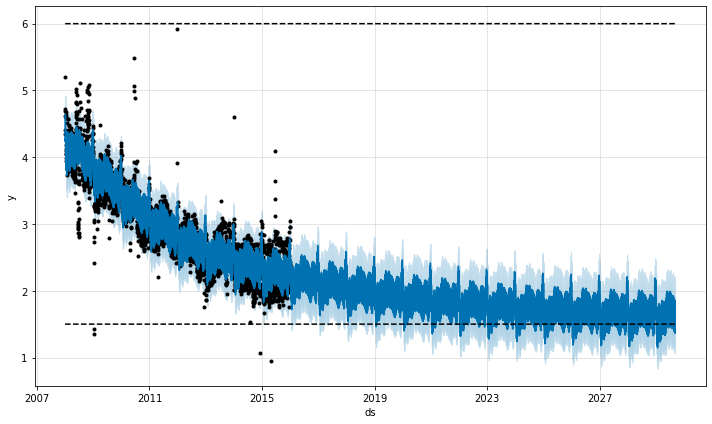

In [ ]:
fig = m.plot(fcst)